In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("preds.csv")

In [6]:
df['sentiment_label'].value_counts()

sentiment_label
POSITIVE    4235
NEGATIVE    1381
NEUTRAL     1212
Name: count, dtype: int64

In [7]:
df.head()

,text,price,price_missing,helpful_vote,verified_purchase,rating,title,asin,parent_asin,user_id,...,product_name,categories,average_rating,rating_number,review_month,year,sentiment_label,POS_confidence,NEU_confidence,NEG_confidence
0,Es muy practico y se ve muy bonito en el refri...,0.0,1,0,True,5,Es muy útil,B07T1LW3JB,B07T1LW3JB,AED4NEML5RUL227FNSTRUXZCHDQQ,...,Homeries Stackable Egg Tray Holder (Holds 12 E...,"Appliances,Parts & Accessories,Refrigerator Pa...",4.3,50,1,2020,NEUTRAL,0.0,0.76,0.24
1,didn't work for me,0.0,1,0,True,3,They run large,B07ZQXTG28,B07ZQXTG28,AFTA3WUBOM3DMNJMSCOSMCDOWPRA,...,"Golf Copper Socks Women, Three street Summer A...",NaN,3.0,1,10,2020,NEGATIVE,0.0,0.03,0.97
2,Would not purchase! No support in the boob are...,0.0,1,0,True,1,Nope!!!!,B08B5NYCHD,B08B5NYCHD,AEPF3NC5YVSQLHE2WL4ZVRB4A3ZA,...,Zando Plus Size Swimsuits for Women One Piece ...,NaN,3.5,35,9,2020,NEGATIVE,0.0,0.01,0.99
3,Muy lindas y delicadas,0.0,1,0,True,5,Encantada,B08FYMZYNJ,B08FYMZYNJ,AF6BFLMUSCETIFYJ3KRK5P4MSVPA,...,Wgoud 14K Gold Plated Letter Huggie Earrings f...,NaN,5.0,2,12,2020,NEUTRAL,0.0,0.77,0.22
4,Awful don’t buy,0.0,1,0,True,1,Horrible,B08D3L6RML,B08D3L6RML,AHBQDOJEJBCSIEUFIZ5VRNBH5LQA,...,MAYFASEY Women's Tie Dye Sweatshirts Oversized...,NaN,1.0,1,11,2020,NEGATIVE,0.0,0.01,0.99


In [15]:
# Ensure 'review_month' is numeric (it should already be but this ensures no issues)
# Ensure review_month and year are integers (if they are not already)
df['review_month'] = df['review_month'].astype(int)
df['year'] = df['year'].astype(int)

# Create a 'review_date' column by combining 'year', 'review_month', and a fixed 'day=1'
df['review_date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['review_month'].astype(str) + '-01', format='%Y-%m-%d')
# Now, calculate the metrics
monthly_metrics = df.groupby(['review_date', 'sentiment_label']).agg(
    avg_pos_confidence=('POS_confidence', 'mean'),
    avg_neu_confidence=('NEU_confidence', 'mean'),
    avg_neg_confidence=('NEG_confidence', 'mean'),
    count_reviews=('sentiment_label', 'count')
).reset_index()


In [29]:
# monthly_metrics


In [33]:
avg_confidence_by_sentiment = df.groupby(['review_date']).agg(
    avg_pos_confidence=('POS_confidence', lambda x: x[df['sentiment_label'] == 'POSITIVE'].mean()),
    avg_neu_confidence=('NEU_confidence', lambda x: x[df['sentiment_label'] == 'NEUTRAL'].mean()),
    avg_neg_confidence=('NEG_confidence', lambda x: x[df['sentiment_label'] == 'NEGATIVE'].mean())
).reset_index()

avg_confidence_by_sentiment['avg_confidence'] = avg_confidence_by_sentiment[['avg_pos_confidence', 'avg_neu_confidence', 'avg_neg_confidence']].mean(axis=1)


avg_confidence_by_sentiment['confidence_change'] = avg_confidence_by_sentiment['avg_neu_confidence'].pct_change() * 100  # Percentage change

threshold = -2

significant_decay = avg_confidence_by_sentiment[avg_confidence_by_sentiment['confidence_change'] <= threshold]

significant_decay

,review_date,avg_pos_confidence,avg_neu_confidence,avg_neg_confidence,avg_confidence,confidence_change
4,2020-05-01,0.898419,0.701084,0.862245,0.820583,-2.386641
7,2020-08-01,0.904377,0.705111,0.842432,0.817307,-3.123865
8,2020-09-01,0.891142,0.687193,0.855508,0.811281,-2.541178


In [21]:
avg_confidence_by_sentiment

,review_date,avg_pos_confidence,avg_neu_confidence,avg_neg_confidence,avg_confidence
0,2020-01-01,0.903051,0.729824,0.837662,0.823512
1,2020-02-01,0.903919,0.720000,0.835500,0.819806
2,2020-03-01,0.897730,0.720843,0.858152,0.825575
3,2020-04-01,0.895130,0.718226,0.826867,0.813408
4,2020-05-01,0.898419,0.701084,0.862245,0.820583
5,2020-06-01,0.903060,0.721266,0.848598,0.824308
6,2020-07-01,0.900775,0.727848,0.851917,0.826847
7,2020-08-01,0.904377,0.705111,0.842432,0.817307
8,2020-09-01,0.891142,0.687193,0.855508,0.811281
9,2020-10-01,0.897444,0.685882,0.807813,0.797046


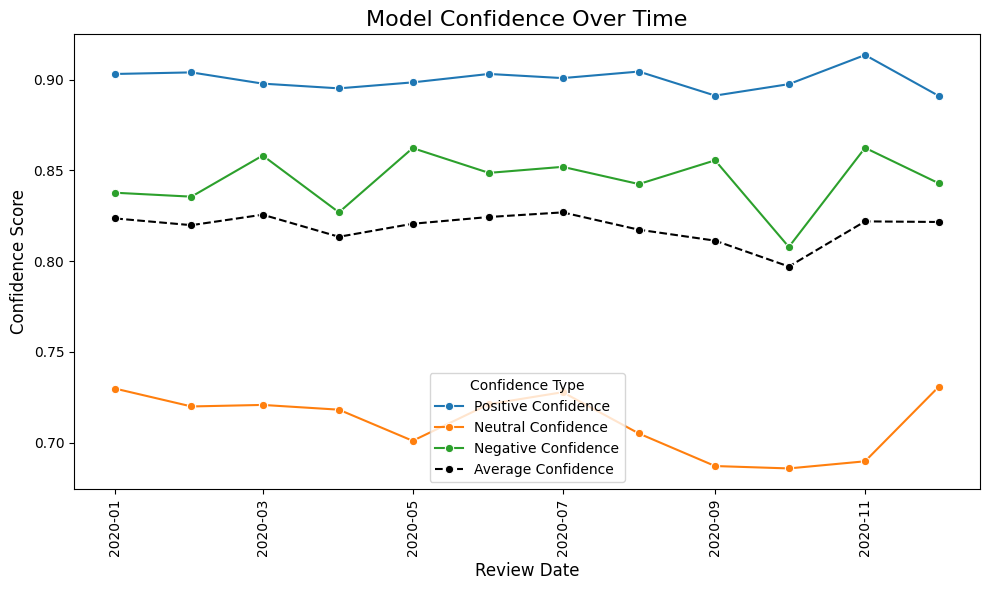

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plotting the confidence values
sns.lineplot(x='review_date', y='avg_pos_confidence', data=avg_confidence_by_sentiment, label='Positive Confidence', marker='o')
sns.lineplot(x='review_date', y='avg_neu_confidence', data=avg_confidence_by_sentiment, label='Neutral Confidence', marker='o')
sns.lineplot(x='review_date', y='avg_neg_confidence', data=avg_confidence_by_sentiment, label='Negative Confidence', marker='o')
sns.lineplot(x='review_date', y='avg_confidence', data=avg_confidence_by_sentiment, label='Average Confidence', marker='o', linestyle='--', color='black')

# Adding titles and labels
plt.title('Model Confidence Over Time', fontsize=16)
plt.xlabel('Review Date', fontsize=12)
plt.ylabel('Confidence Score', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Ensure the plot fits well
plt.legend(title='Confidence Type')

# Display the plot
plt.tight_layout()
plt.show()


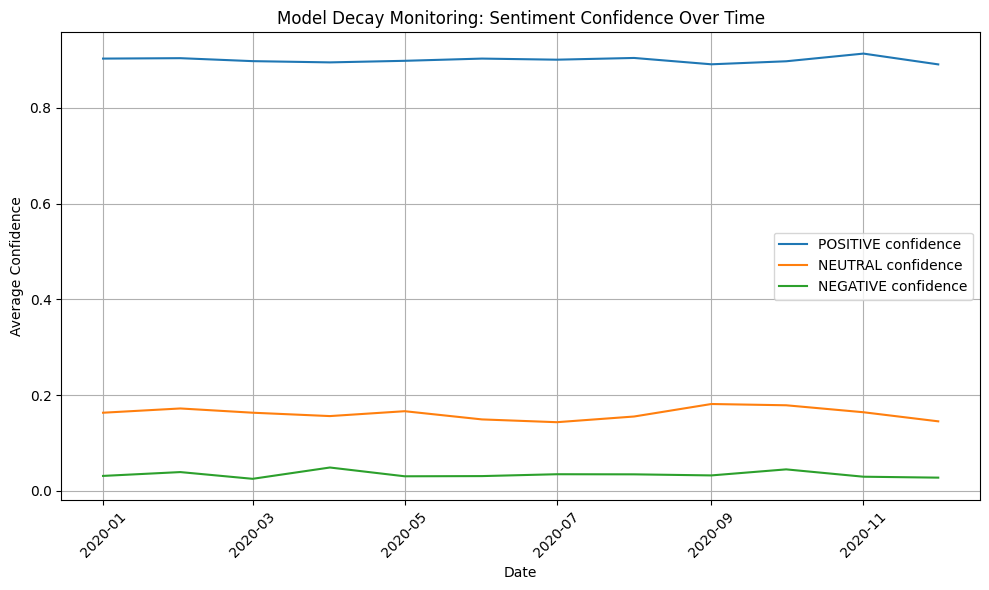

In [17]:
import matplotlib.pyplot as plt

# Plot average confidence over time for each sentiment label
plt.figure(figsize=(10, 6))

for sentiment in ['POSITIVE', 'NEUTRAL', 'NEGATIVE']:
    subset = monthly_metrics[monthly_metrics['sentiment_label'] == sentiment]
    plt.plot(subset['review_date'], subset['avg_pos_confidence'], label=f'{sentiment} confidence')

plt.title('Model Decay Monitoring: Sentiment Confidence Over Time')
plt.xlabel('Date')
plt.ylabel('Average Confidence')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
